## Pandas - Covid-19


In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

URL = "https://pomber.github.io/covid19/timeseries.json"
r = requests.get(URL)
data = r.json()


In [3]:
df = pd.DataFrame.from_dict(data['US'])
df.tail()

,confirmed,date,deaths,recovered
279,8778055,2020-10-27,226696,3487666
280,8856413,2020-10-28,227685,3518140
281,8944934,2020-10-29,228656,3554336
282,9044255,2020-10-30,229686,3578452
283,9125482,2020-10-31,230548,3612478


In [4]:
df.index = pd.DatetimeIndex(pd.to_datetime(df['date']))

In [5]:
df.tail()

,confirmed,date,deaths,recovered
date,,,,
2020-10-27,8778055,2020-10-27,226696,3487666
2020-10-28,8856413,2020-10-28,227685,3518140
2020-10-29,8944934,2020-10-29,228656,3554336
2020-10-30,9044255,2020-10-30,229686,3578452
2020-10-31,9125482,2020-10-31,230548,3612478


In [6]:
df.drop(columns='date',inplace=True)

In [7]:
df.tail()

,confirmed,deaths,recovered
date,,,
2020-10-27,8778055,226696,3487666
2020-10-28,8856413,227685,3518140
2020-10-29,8944934,228656,3554336
2020-10-30,9044255,229686,3578452
2020-10-31,9125482,230548,3612478


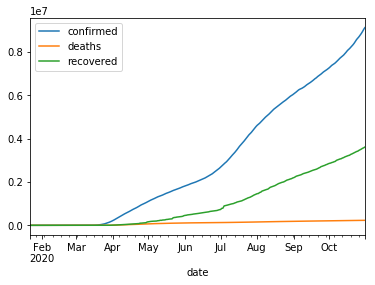

In [8]:
df.plot()

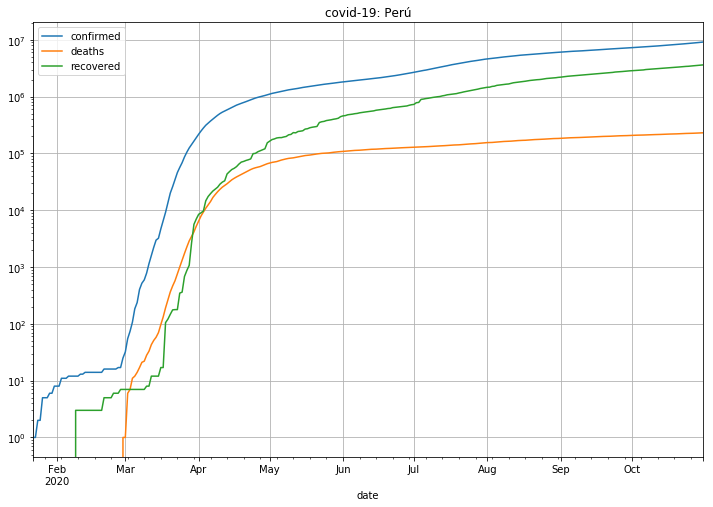

In [9]:
df.plot(figsize=(12,8), grid=True, logy=True, title='covid-19: Perú')

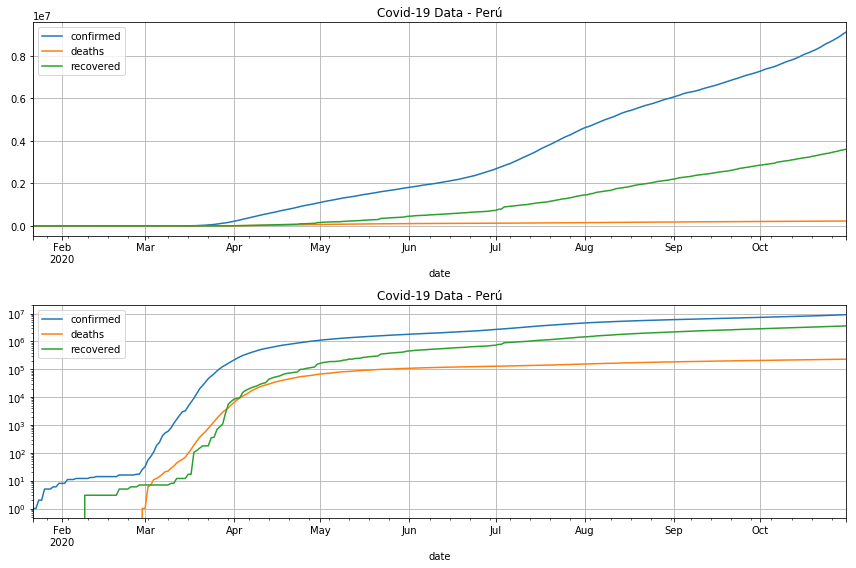

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(12,8))

df.plot(grid=True, title="Covid-19 Data - Perú",ax=ax1)
df.plot(grid=True, title="Covid-19 Data - Perú",logy=True, ax=ax2)
plt.tight_layout()
plt.show()


In [11]:
#Casos diarios
df_diarios = df.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0], raw=False) 
#Rolling poner una ventana al principio para ver algunos valores de un DF
df_diarios.tail()


,confirmed,deaths,recovered
date,,,
2020-10-27,73632.0,986.0,27211.0
2020-10-28,78358.0,989.0,30474.0
2020-10-29,88521.0,971.0,36196.0
2020-10-30,99321.0,1030.0,24116.0
2020-10-31,81227.0,862.0,34026.0


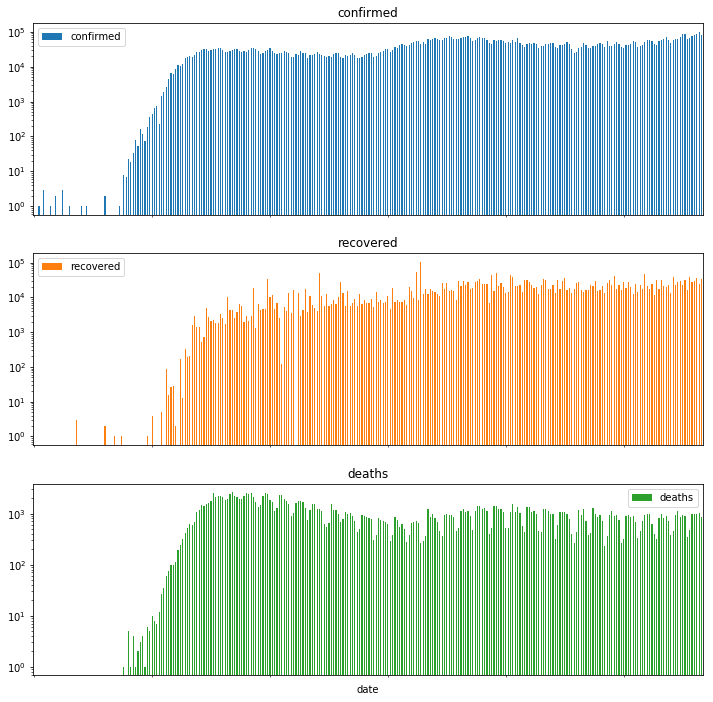

In [14]:
df_diarios.plot(kind='bar',y=['confirmed','recovered','deaths'],
                subplots=True,layout=(3,1),figsize=(12,12),logy=True)
plt.xticks([])
plt.show()

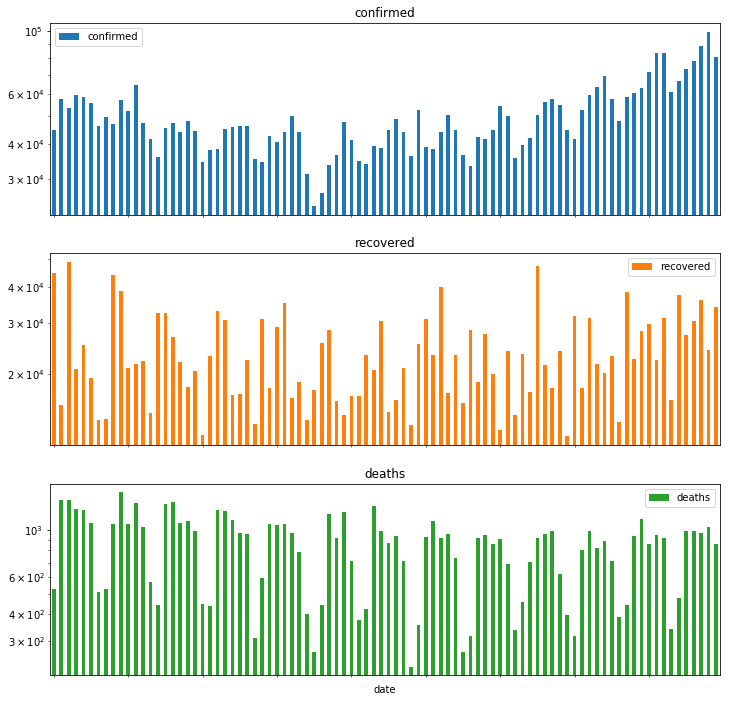

In [16]:
#Los ultimos 3 meses
df_diarios.iloc[-90:,:].plot(kind='bar',y=['confirmed','recovered','deaths'],
                subplots=True,layout=(3,1),figsize=(12,12),logy=True)
plt.xticks([])
plt.show()

In [23]:
#Evaluacion de la tendencia y el seguimiento de los datos
ma = df.rolling(window=7).mean()
ma.tail(7) #Promedio de los confirmados, fallecidos y recuperados de los ultimos 7 dias

,confirmed,deaths,recovered
date,,,
2020-10-25,8.420555e+06,222928.285714,3.349875e+06
2020-10-26,8.490543e+06,223726.571429,3.376711e+06
2020-10-27,8.562427e+06,224532.428571,3.404213e+06
2020-10-28,8.636538e+06,225318.857143,3.432040e+06
2020-10-29,8.713051e+06,226121.714286,3.460794e+06
2020-10-30,8.791789e+06,226937.000000,3.489798e+06
2020-10-31,8.870170e+06,227744.857143,3.519201e+06


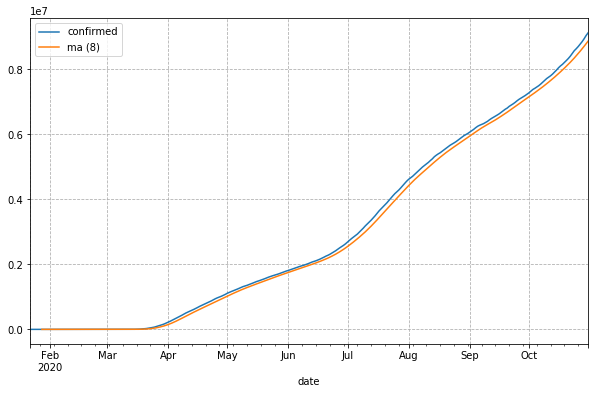

In [30]:
fig=plt.figure(figsize=(10,6))
df['confirmed'].plot(label='confirmed')
ma['confirmed'].plot(label='ma (8)')
plt.grid(linestyle='dashed')
plt.legend()
plt.show()

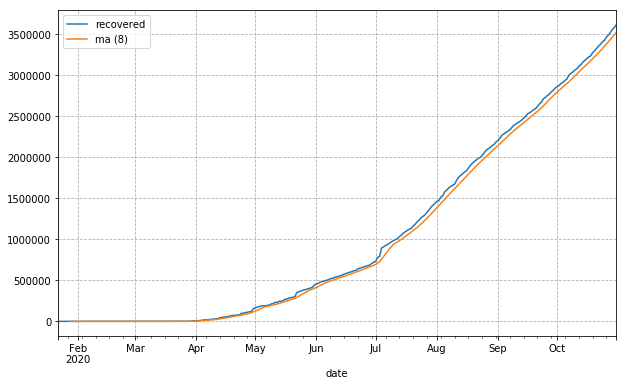

In [31]:
fig=plt.figure(figsize=(10,6))
df['recovered'].plot(label='recovered')
ma['recovered'].plot(label='ma (8)')
plt.grid(linestyle='dashed')
plt.legend()
plt.show()